In [1]:
## importar librerias
import pandas as pd ## manipulacion de base de datos
import numpy as np## operaciones aritmeticas
import seaborn as sns ## graficas estadisticas
import matplotlib.pyplot as plt ## graficas generales
import plotly.express as px ## graficas interactivas

# Carga de Base de Datos

In [2]:
url1='http://medata.gov.co/sites/default/files/distribution/1-026-22-000126/registro_hospitalizacion_prestacion_servicios_medicos.csv'##
df_reporte_salud=pd.read_csv(url1)

/tmp/ipython-input-2-3270242372.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reporte_salud=pd.read_csv(url1)


In [3]:
## carga listado de cie10 con generalidades
urlnos='https://github.com/Ilevazu/Proyecto_Final_ADBC/raw/main/CieFin.xlsx'
df_lisc=pd.read_excel(urlnos,
                         sheet_name="Hoja1",
                         usecols=[0,3,4],
                         header=1,
                         dtype=str)

In [4]:
df_lisc

,A000,1,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS (A00-B99)
0,A001,1,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...
1,A009,1,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...
2,A010,1,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...
3,A011,1,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...
4,A012,1,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIA...
...,...,...,...
12628,Z992,21,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
12629,Z993,21,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
12630,Z994,21,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
12631,Z998,21,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


# Analisis Exploratorio

In [5]:
## validamos tamaño de DF
df_reporte_salud.shape

(839738, 24)

In [6]:
## visualizamos df
df_reporte_salud

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,FechaEgreso,CodigoEAPB,TipoUsuario,Edad,UnidadMedidaEdad,Sexo,CodDepto,CodMunicipio,ZonaResidencia,Ano
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,"\""\""","\""\""",...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,"\""\""","\""\""",...,2020-01-08,EPSS40,2,96,1,M,05,001,U,2019
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,"\""\""","\""\""",...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,"\""\""","\""\""",...,2019-12-10,EPS010,1,1,1,F,05,001,U,2019
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,"\""\""","\""\""",...,2019-12-27,05001,3,10,3,M,05,001,U,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,FH3001762,50010210401,1,2022-02-10,05:55,13,S060,S064,"\""\""","\""\""",...,2022-02-17,EPS010,1,1,1,M,5,88,U,2022
839734,FH3003013,50010210401,1,2022-02-13,13:28,13,J22X,N390,"\""\""","\""\""",...,2022-02-18,EMP028,5,1,1,F,5,88,U,2022
839735,FH3035502,50010210401,1,2022-03-24,13:58,13,J219,J219,"\""\""","\""\""",...,2022-03-25,EPS010,1,4,2,F,5,1,U,2022
839736,FH3028015,50010210401,1,2022-03-05,16:26,13,T784,K904,"\""\""","\""\""",...,2022-03-16,EPS010,1,3,2,M,5,88,U,2022


In [7]:
## Copia de DF para ser trabajada
df_reporte_salud_copia=df_reporte_salud

In [8]:
## LLamada de Datos
df_reporte_salud_copia.head()

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,FechaEgreso,CodigoEAPB,TipoUsuario,Edad,UnidadMedidaEdad,Sexo,CodDepto,CodMunicipio,ZonaResidencia,Ano
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,"\""\""","\""\""",...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,"\""\""","\""\""",...,2020-01-08,EPSS40,2,96,1,M,05,001,U,2019
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,"\""\""","\""\""",...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,"\""\""","\""\""",...,2019-12-10,EPS010,1,1,1,F,05,001,U,2019
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,"\""\""","\""\""",...,2019-12-27,05001,3,10,3,M,05,001,U,2019


In [9]:
df_reporte_salud_copia.describe()

,CodigoPrestador,ViaIngreso,CausaExterna,EstadoSalida,TipoUsuario,Edad,UnidadMedidaEdad,Ano
count,8.397380e+05,839738.000000,839738.000000,839738.000000,839738.000000,839738.000000,839738.000000,839738.000000
mean,5.001035e+10,1.653694,12.865402,1.042884,1.959258,45.718597,1.059422,2020.607314
std,2.768222e+05,0.920597,2.028201,0.202595,1.253418,25.609545,0.278620,1.171759
min,5.001012e+10,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2019.000000
25%,5.001021e+10,1.000000,13.000000,1.000000,1.000000,24.000000,1.000000,2019.000000
50%,5.001022e+10,1.000000,13.000000,1.000000,2.000000,45.000000,1.000000,2021.000000
75%,5.001046e+10,3.000000,13.000000,1.000000,2.000000,68.000000,1.000000,2022.000000
max,5.001851e+10,4.000000,15.000000,2.000000,8.000000,119.000000,3.000000,2022.000000


In [10]:
df_reporte_salud_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839738 entries, 0 to 839737
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   NumeroFactura                      839738 non-null  object
 1   CodigoPrestador                    839738 non-null  int64 
 2   ViaIngreso                         839738 non-null  int64 
 3   FechaIngreso                       839738 non-null  object
 4   HoraIngreso                        839738 non-null  object
 5   CausaExterna                       839738 non-null  int64 
 6   CodigoDiagnosticoPrincipalIngreso  839738 non-null  object
 7   CodigoDiagnosticoPrincipalEgreso   839738 non-null  object
 8   CodigoDiagnosticoRelN1Egreso       674510 non-null  object
 9   CodigoDiagnosticoRelN2Egreso       615297 non-null  object
 10  CodigoDiagnosticoRelN3Egreso       595844 non-null  object
 11  CodigoDiagnosticoComplicacion      575578 non-null  

In [11]:
columnas=list(df_reporte_salud_copia.columns)

In [12]:
## Identificar valores unicos
for i in columnas:
  print(f"valores unicos de la columna {i}")
  print(pd.unique(df_reporte_salud_copia[i]))

valores unicos de la columna NumeroFactura
['GE301820179' 'GER183756' 'GE301820180' ... 'FH3035502' 'FH3028015'
 'FH3028029']
valores unicos de la columna CodigoPrestador
[50010217857 50010217808 50011313101 50010217804 50010210401 50010214401
 50010464802 50010209201 50010217501 50010548201 50010590903 50010217801
 50010217203 50010608601 50010115001 50010379501 50010212601 50010212401
 50010217861 50010217862 50010909923 50010558601 50010209202 50010211001
 50010217807 50010558603 50010210101 50010397801 50010344803 50010212001
 50010478901 50011174601 50010239301 50010952501 50010447101 50010182101
 50010217809 50010218601 50010217810 50010217802 50018509280 50010329301
 50010217811 50010217854 50010558607 50010558602 50010217202 50010397806
 50010561601 50010902223 50011110307 50011738301 50010217201 50010790401
 50011114701 50010909901 50010397807 50011114704 50010952502 50010558604
 50011114703 50011679101 50010558606 50011315201 50011195801 50010558605
 50011110304 50011930101 5

In [13]:
## convierto el df a diccionario el listado de generalidades
diccionario_licie=df_lisc.set_index(
    df_lisc.columns[0])[df_lisc.columns[1]].to_dict()

In [14]:
## verifico el diccionario generado
diccionario_licie

{'A001': '1',
 'A009': '1',
 'A010': '1',
 'A011': '1',
 'A012': '1',
 'A013': '1',
 'A014': '1',
 'A020': '1',
 'A021': '1',
 'A022': '1',
 'A028': '1',
 'A029': '1',
 'A030': '1',
 'A031': '1',
 'A032': '1',
 'A033': '1',
 'A038': '1',
 'A039': '1',
 'A040': '1',
 'A041': '1',
 'A042': '1',
 'A043': '1',
 'A044': '1',
 'A045': '1',
 'A046': '1',
 'A047': '1',
 'A048': '1',
 'A049': '1',
 'A050': '1',
 'A051': '1',
 'A052': '1',
 'A053': '1',
 'A054': '1',
 'A058': '1',
 'A059': '1',
 'A060': '1',
 'A061': '1',
 'A062': '1',
 'A063': '1',
 'A064': '1',
 'A065': '1',
 'A066': '1',
 'A067': '1',
 'A068': '1',
 'A069': '1',
 'A070': '1',
 'A071': '1',
 'A072': '1',
 'A073': '1',
 'A078': '1',
 'A079': '1',
 'A080': '1',
 'A081': '1',
 'A082': '1',
 'A083': '1',
 'A084': '1',
 'A085': '1',
 'A090': '1',
 'A099': '1',
 'A09X': '1',
 'A150': '1',
 'A151': '1',
 'A152': '1',
 'A153': '1',
 'A154': '1',
 'A155': '1',
 'A156': '1',
 'A157': '1',
 'A158': '1',
 'A159': '1',
 'A160': '1',
 'A161

# LImpieza de Datos

In [15]:
## Pasar datos a nulos
df_reporte_salud_copia.replace(["", " ","nan","\\",'\"\"','\\"\\"','<NA>'], None)
df_reporte_salud_copia
## Se visualiza que no tomo los cambios a nulos de \\

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,FechaEgreso,CodigoEAPB,TipoUsuario,Edad,UnidadMedidaEdad,Sexo,CodDepto,CodMunicipio,ZonaResidencia,Ano
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,"\""\""","\""\""",...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,"\""\""","\""\""",...,2020-01-08,EPSS40,2,96,1,M,05,001,U,2019
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,"\""\""","\""\""",...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,"\""\""","\""\""",...,2019-12-10,EPS010,1,1,1,F,05,001,U,2019
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,"\""\""","\""\""",...,2019-12-27,05001,3,10,3,M,05,001,U,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,FH3001762,50010210401,1,2022-02-10,05:55,13,S060,S064,"\""\""","\""\""",...,2022-02-17,EPS010,1,1,1,M,5,88,U,2022
839734,FH3003013,50010210401,1,2022-02-13,13:28,13,J22X,N390,"\""\""","\""\""",...,2022-02-18,EMP028,5,1,1,F,5,88,U,2022
839735,FH3035502,50010210401,1,2022-03-24,13:58,13,J219,J219,"\""\""","\""\""",...,2022-03-25,EPS010,1,4,2,F,5,1,U,2022
839736,FH3028015,50010210401,1,2022-03-05,16:26,13,T784,K904,"\""\""","\""\""",...,2022-03-16,EPS010,1,3,2,M,5,88,U,2022


In [16]:
##Expresiones regulares para cambiar los \\ a nuelos y los lea como salto de linea
df_reporte_salud_copia.replace([r'\"\"',r'\\"\\"',r"<NA>"],None, regex=True, inplace=True)

In [17]:
## Identificar valores unicos
for i in columnas:
  print(f"valores unicos de la columna {i}")
  print(pd.unique(df_reporte_salud_copia[i]))

valores unicos de la columna NumeroFactura
['GE301820179' 'GER183756' 'GE301820180' ... 'FH3035502' 'FH3028015'
 'FH3028029']
valores unicos de la columna CodigoPrestador
[50010217857 50010217808 50011313101 50010217804 50010210401 50010214401
 50010464802 50010209201 50010217501 50010548201 50010590903 50010217801
 50010217203 50010608601 50010115001 50010379501 50010212601 50010212401
 50010217861 50010217862 50010909923 50010558601 50010209202 50010211001
 50010217807 50010558603 50010210101 50010397801 50010344803 50010212001
 50010478901 50011174601 50010239301 50010952501 50010447101 50010182101
 50010217809 50010218601 50010217810 50010217802 50018509280 50010329301
 50010217811 50010217854 50010558607 50010558602 50010217202 50010397806
 50010561601 50010902223 50011110307 50011738301 50010217201 50010790401
 50011114701 50010909901 50010397807 50011114704 50010952502 50010558604
 50011114703 50011679101 50010558606 50011315201 50011195801 50010558605
 50011110304 50011930101 5

In [18]:
##Cambiar los datos de int64 a int8 para reducir el tamaño de la bd

In [19]:
df_reporte_salud_copia["TipoUsuario"] = df_reporte_salud_copia["TipoUsuario"].astype('uint8')
df_reporte_salud_copia["EstadoSalida"] = df_reporte_salud_copia["EstadoSalida"].astype('uint8')
df_reporte_salud_copia["CausaExterna"] = df_reporte_salud_copia["CausaExterna"].astype('uint8')
df_reporte_salud_copia["ViaIngreso"] = df_reporte_salud_copia["ViaIngreso"].astype('uint8')

In [20]:
##Cambiar datos a tipo fecha
df_reporte_salud_copia["FechaIngreso"]=pd.to_datetime(df_reporte_salud_copia["FechaIngreso"], format="%Y-%m-%d")
df_reporte_salud_copia["FechaEgreso"]=pd.to_datetime(df_reporte_salud_copia["FechaEgreso"], format="%Y-%m-%d")

In [21]:
df_reporte_salud_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839738 entries, 0 to 839737
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   NumeroFactura                      839738 non-null  object        
 1   CodigoPrestador                    839738 non-null  int64         
 2   ViaIngreso                         839738 non-null  uint8         
 3   FechaIngreso                       839738 non-null  datetime64[ns]
 4   HoraIngreso                        839738 non-null  object        
 5   CausaExterna                       839738 non-null  uint8         
 6   CodigoDiagnosticoPrincipalIngreso  839738 non-null  object        
 7   CodigoDiagnosticoPrincipalEgreso   839738 non-null  object        
 8   CodigoDiagnosticoRelN1Egreso       336644 non-null  object        
 9   CodigoDiagnosticoRelN2Egreso       141877 non-null  object        
 10  CodigoDiagnosticoRel

In [22]:
## Identificar valores unicos
for i in columnas:
  print(f"valores unicos de la columna {i}")
  print(pd.unique(df_reporte_salud_copia[i]))

valores unicos de la columna NumeroFactura
['GE301820179' 'GER183756' 'GE301820180' ... 'FH3035502' 'FH3028015'
 'FH3028029']
valores unicos de la columna CodigoPrestador
[50010217857 50010217808 50011313101 50010217804 50010210401 50010214401
 50010464802 50010209201 50010217501 50010548201 50010590903 50010217801
 50010217203 50010608601 50010115001 50010379501 50010212601 50010212401
 50010217861 50010217862 50010909923 50010558601 50010209202 50010211001
 50010217807 50010558603 50010210101 50010397801 50010344803 50010212001
 50010478901 50011174601 50010239301 50010952501 50010447101 50010182101
 50010217809 50010218601 50010217810 50010217802 50018509280 50010329301
 50010217811 50010217854 50010558607 50010558602 50010217202 50010397806
 50010561601 50010902223 50011110307 50011738301 50010217201 50010790401
 50011114701 50010909901 50010397807 50011114704 50010952502 50010558604
 50011114703 50011679101 50010558606 50011315201 50011195801 50010558605
 50011110304 50011930101 5

In [23]:
##recorre la columna por longitud, si tiene 4 caracteres dejar los dos primeros.
##si tiene 1 solo agregar el 0 adelante
## se modifica los valores 5,8 ubicando el valor 05 y 08 respectivamente
## se modifica los valores 00,0 como valores nulos para el campo CodDepto
lista_caracteres1 = []
for i in df_reporte_salud_copia["CodDepto"]:
  if pd.isna(i):
    lista_caracteres1.append(None)
  else:
    string_i = str(i) # convierte string para manejar valores flotantes
    if "." in string_i:
      entero, decimal = string_i.split(".")
      if entero=='5':
         lista_caracteres1.append('05')
      elif  string_i=='8':
        lista_caracteres1.append('08')
      else:
         lista_caracteres1.append(entero)
    else:
      if string_i=='5':
        lista_caracteres1.append('05')
      elif  string_i=='8':
        lista_caracteres1.append('08')
      elif string_i=='0':
        lista_caracteres1.append(None)
      elif string_i=='00':
        lista_caracteres1.append(None)
      else:
       lista_caracteres1.append(string_i)



In [24]:
'5' in (lista_caracteres1)

False

In [25]:
lista_caracteres1

['05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '27',
 '27',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',

In [26]:
## reemplazar los datos en el df con las listas generadas
df_reporte_salud_copia["CodDepto"]=lista_caracteres1
df_reporte_salud_copia

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,FechaEgreso,CodigoEAPB,TipoUsuario,Edad,UnidadMedidaEdad,Sexo,CodDepto,CodMunicipio,ZonaResidencia,Ano
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,None,None,...,2020-01-08,EPSS40,2,96,1,M,05,001,U,2019
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,None,None,...,2019-12-10,EPS010,1,1,1,F,05,001,U,2019
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,None,None,...,2019-12-27,05001,3,10,3,M,05,001,U,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,FH3001762,50010210401,1,2022-02-10,05:55,13,S060,S064,None,None,...,2022-02-17,EPS010,1,1,1,M,05,88,U,2022
839734,FH3003013,50010210401,1,2022-02-13,13:28,13,J22X,N390,None,None,...,2022-02-18,EMP028,5,1,1,F,05,88,U,2022
839735,FH3035502,50010210401,1,2022-03-24,13:58,13,J219,J219,None,None,...,2022-03-25,EPS010,1,4,2,F,05,1,U,2022
839736,FH3028015,50010210401,1,2022-03-05,16:26,13,T784,K904,None,None,...,2022-03-16,EPS010,1,3,2,M,05,88,U,2022


In [27]:
## Identificar valores unicos
for i in columnas:
  print(f"valores unicos de la columna {i}")
  print(pd.unique(df_reporte_salud_copia[i]))

valores unicos de la columna NumeroFactura
['GE301820179' 'GER183756' 'GE301820180' ... 'FH3035502' 'FH3028015'
 'FH3028029']
valores unicos de la columna CodigoPrestador
[50010217857 50010217808 50011313101 50010217804 50010210401 50010214401
 50010464802 50010209201 50010217501 50010548201 50010590903 50010217801
 50010217203 50010608601 50010115001 50010379501 50010212601 50010212401
 50010217861 50010217862 50010909923 50010558601 50010209202 50010211001
 50010217807 50010558603 50010210101 50010397801 50010344803 50010212001
 50010478901 50011174601 50010239301 50010952501 50010447101 50010182101
 50010217809 50010218601 50010217810 50010217802 50018509280 50010329301
 50010217811 50010217854 50010558607 50010558602 50010217202 50010397806
 50010561601 50010902223 50011110307 50011738301 50010217201 50010790401
 50011114701 50010909901 50010397807 50011114704 50010952502 50010558604
 50011114703 50011679101 50010558606 50011315201 50011195801 50010558605
 50011110304 50011930101 5

In [28]:
## identificar los valores nulos en un df
df_reporte_salud_copia.isnull()

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,FechaEgreso,CodigoEAPB,TipoUsuario,Edad,UnidadMedidaEdad,Sexo,CodDepto,CodMunicipio,ZonaResidencia,Ano
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
839734,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
839735,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
839736,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [29]:
## cuantifica los nulos por cada columna
df_reporte_salud_copia.isnull().sum()

,0
NumeroFactura,0
CodigoPrestador,0
ViaIngreso,0
FechaIngreso,0
HoraIngreso,0
CausaExterna,0
CodigoDiagnosticoPrincipalIngreso,0
CodigoDiagnosticoPrincipalEgreso,0
CodigoDiagnosticoRelN1Egreso,503094
CodigoDiagnosticoRelN2Egreso,697861


In [30]:
## analisis estadistico descriptivo de variables numericas y categorias del DF
df_reporte_salud_copia.describe()

,CodigoPrestador,ViaIngreso,FechaIngreso,CausaExterna,EstadoSalida,FechaEgreso,TipoUsuario,Edad,UnidadMedidaEdad,Ano
count,8.397380e+05,839738.000000,839738,839738.000000,839738.000000,839738,839738.000000,839738.000000,839738.000000,839738.000000
mean,5.001035e+10,1.653694,2021-02-14 03:14:36.590554880,12.865402,1.042884,2021-02-20 16:21:21.245339904,1.959258,45.718597,1.059422,2020.607314
min,5.001012e+10,1.000000,2019-01-01 00:00:00,1.000000,1.000000,2019-01-01 00:00:00,1.000000,0.000000,1.000000,2019.000000
25%,5.001021e+10,1.000000,2019-12-23 00:00:00,13.000000,1.000000,2019-12-30 00:00:00,1.000000,24.000000,1.000000,2019.000000
50%,5.001022e+10,1.000000,2021-03-24 00:00:00,13.000000,1.000000,2021-03-31 00:00:00,2.000000,45.000000,1.000000,2021.000000
75%,5.001046e+10,3.000000,2022-03-16 00:00:00,13.000000,1.000000,2022-03-22 00:00:00,2.000000,68.000000,1.000000,2022.000000
max,5.001851e+10,4.000000,2022-12-31 00:00:00,15.000000,2.000000,2023-05-29 00:00:00,8.000000,119.000000,3.000000,2022.000000
std,2.768222e+05,0.920597,NaN,2.028201,0.202595,NaN,1.253418,25.609545,0.278620,1.171759


In [31]:
df_reporte_salud_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839738 entries, 0 to 839737
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   NumeroFactura                      839738 non-null  object        
 1   CodigoPrestador                    839738 non-null  int64         
 2   ViaIngreso                         839738 non-null  uint8         
 3   FechaIngreso                       839738 non-null  datetime64[ns]
 4   HoraIngreso                        839738 non-null  object        
 5   CausaExterna                       839738 non-null  uint8         
 6   CodigoDiagnosticoPrincipalIngreso  839738 non-null  object        
 7   CodigoDiagnosticoPrincipalEgreso   839738 non-null  object        
 8   CodigoDiagnosticoRelN1Egreso       336644 non-null  object        
 9   CodigoDiagnosticoRelN2Egreso       141877 non-null  object        
 10  CodigoDiagnosticoRel

In [32]:
df_reporte_salud_copia


,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,FechaEgreso,CodigoEAPB,TipoUsuario,Edad,UnidadMedidaEdad,Sexo,CodDepto,CodMunicipio,ZonaResidencia,Ano
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,None,None,...,2020-01-08,EPSS40,2,96,1,M,05,001,U,2019
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,2019-11-08,EPSS40,2,83,1,F,05,001,U,2019
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,None,None,...,2019-12-10,EPS010,1,1,1,F,05,001,U,2019
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,None,None,...,2019-12-27,05001,3,10,3,M,05,001,U,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,FH3001762,50010210401,1,2022-02-10,05:55,13,S060,S064,None,None,...,2022-02-17,EPS010,1,1,1,M,05,88,U,2022
839734,FH3003013,50010210401,1,2022-02-13,13:28,13,J22X,N390,None,None,...,2022-02-18,EMP028,5,1,1,F,05,88,U,2022
839735,FH3035502,50010210401,1,2022-03-24,13:58,13,J219,J219,None,None,...,2022-03-25,EPS010,1,4,2,F,05,1,U,2022
839736,FH3028015,50010210401,1,2022-03-05,16:26,13,T784,K904,None,None,...,2022-03-16,EPS010,1,3,2,M,05,88,U,2022


In [33]:
## Incluir al DF una columna con los nombres de los accidentes segun en numero indicado en la column CausaExterna
## str(x).strip() en caso de que la variable fuera string
df_reporte_salud_copia['CausaExternaNombre'] = df_reporte_salud_copia['CausaExterna'].apply(lambda x:
    'Accidente de trabajo' if x == 1
    else 'Accidente de transito' if x == 2
    else 'Accidente rábico' if x == 3
    else 'Accidente Ofidico' if x == 4
    else 'Otro tipo de Accidente' if x == 5
    else 'Evento Catastrófico' if x == 6
    else 'Lesión por agresión' if x == 7
    else 'Lesión auto infringida' if x == 8
    else 'Sospecha de maltrato' if x == 9
    else 'Sospecha de abuso sexual' if x == 10
    else 'Sospecha de violencia sexual' if x == 11
    else 'Sospecha de maltrato emocional' if x == 12
    else 'Enfermedad general' if x == 13
    else 'Enfermedad laboral' if x == 14
    else 'Otra'if x == 15
    else x)

In [34]:
## Incluir al DF una columna con el estado de salida
df_reporte_salud_copia['nombreEstadoSalida'] = df_reporte_salud_copia['EstadoSalida'].apply(lambda x:
    'Vivo' if x == 1
    else 'Muerto' if x == 2
    else x)

In [35]:
##Incluir al DF una Columna con el tipo de usuario
df_reporte_salud_copia['nombreTipoUsuario'] = df_reporte_salud_copia['TipoUsuario'].apply(lambda x:
    'Contributivo' if x == 1
    else 'Subsidiado' if x == 2
    else 'Vinculado' if x == 3
    else 'Particular' if x == 4
    else 'Otro' if x == 5
    else 'Víctima con afiliación al régimen Contributivo' if x == 6
    else 'Víctima con afiliación al Régimen subsidiado' if x == 7
    else 'Víctima no asegurado' if x == 8
    else x)

In [36]:
##Incluir al DF una Columna con el tipo de usuario
df_reporte_salud_copia['nombreViaIngreso'] = df_reporte_salud_copia['ViaIngreso'].apply(lambda x:
    'Urgencias' if x == 1
    else 'SubConsulta externa o programada' if x == 2
    else 'Remitido' if x == 3
    else 'Nacido en la institución' if x == 4
    else x)

In [37]:
##Covertir a numero la zona de residencia
df_reporte_salud_copia['codZonaResidencia'] = df_reporte_salud_copia['ZonaResidencia'].apply(lambda x:
    1 if x == 'U'
    else 2 if x == 'R'
    else x)

In [38]:
df_reporte_salud_copia

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,Sexo,CodDepto,CodMunicipio,ZonaResidencia,Ano,CausaExternaNombre,nombreEstadoSalida,nombreTipoUsuario,nombreViaIngreso,codZonaResidencia
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,F,05,001,U,2019,Otro tipo de Accidente,Vivo,Subsidiado,Remitido,1
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,None,None,...,M,05,001,U,2019,Enfermedad general,Muerto,Subsidiado,Remitido,1
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,F,05,001,U,2019,Otro tipo de Accidente,Vivo,Subsidiado,Remitido,1
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,None,None,...,F,05,001,U,2019,Enfermedad general,Vivo,Contributivo,Urgencias,1
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,None,None,...,M,05,001,U,2019,Enfermedad general,Vivo,Vinculado,Nacido en la institución,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,FH3001762,50010210401,1,2022-02-10,05:55,13,S060,S064,None,None,...,M,05,88,U,2022,Enfermedad general,Vivo,Contributivo,Urgencias,1
839734,FH3003013,50010210401,1,2022-02-13,13:28,13,J22X,N390,None,None,...,F,05,88,U,2022,Enfermedad general,Vivo,Otro,Urgencias,1
839735,FH3035502,50010210401,1,2022-03-24,13:58,13,J219,J219,None,None,...,F,05,1,U,2022,Enfermedad general,Vivo,Contributivo,Urgencias,1
839736,FH3028015,50010210401,1,2022-03-05,16:26,13,T784,K904,None,None,...,M,05,88,U,2022,Enfermedad general,Vivo,Contributivo,Urgencias,1


In [39]:
## Transformacion de edades a días para homologar
df_reporte_salud_copia['EdadReal'] = df_reporte_salud_copia.apply(lambda row:
    row['Edad'] * 365 if row['UnidadMedidaEdad'] == 1
    else row['Edad'] * 30 if row['UnidadMedidaEdad']  == 2
    else row['Edad'], axis=1)

In [40]:
##pasar de días a años
df_reporte_salud_copia["EdadAño"]=df_reporte_salud_copia["EdadReal"]/365

In [41]:
## Carga de diccionario a campos nuevos
df_reporte_salud_copia['Codingnuev'] = df_reporte_salud_copia['CodigoDiagnosticoPrincipalIngreso'].apply(lambda x: diccionario_licie.get(x, 0))
df_reporte_salud_copia['CodEngnuev'] = df_reporte_salud_copia['CodigoDiagnosticoPrincipalEgreso'].apply(lambda x: diccionario_licie.get(x, 0))
df_reporte_salud_copia['CodMuernuev'] = df_reporte_salud_copia['CausaBasicaMuerte'].apply(lambda x: diccionario_licie.get(x, 0))
df_reporte_salud_copia['CodCompnuev'] = df_reporte_salud_copia['CodigoDiagnosticoComplicacion'].apply(lambda x: diccionario_licie.get(x, 0))


In [42]:
df_reporte_salud_copia["MesIngres"]=df_reporte_salud_copia["FechaIngreso"].dt.month

In [43]:
df_reporte_salud_copia["MesEngres"]=df_reporte_salud_copia["FechaEgreso"].dt.month
df_reporte_salud_copia["AnoEngres"]=df_reporte_salud_copia["FechaEgreso"].dt.year
df_reporte_salud_copia["AnoIngres"]=df_reporte_salud_copia["FechaIngreso"].dt.year


In [44]:
## acctualizacion de informacion en el DF
df_reporte_salud_copia

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,EdadReal,EdadAño,Codingnuev,CodEngnuev,CodMuernuev,CodCompnuev,MesIngres,MesEngres,AnoEngres,AnoIngres
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,30295,83.000000,19,19,0,0,10,11,2019,2019
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,None,None,...,35040,96.000000,10,10,10,0,12,1,2020,2019
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,30295,83.000000,19,19,0,0,10,11,2019,2019
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,None,None,...,365,1.000000,1,1,0,0,12,12,2019,2019
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,None,None,...,10,0.027397,16,16,0,0,12,12,2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,FH3001762,50010210401,1,2022-02-10,05:55,13,S060,S064,None,None,...,365,1.000000,19,19,0,0,2,2,2022,2022
839734,FH3003013,50010210401,1,2022-02-13,13:28,13,J22X,N390,None,None,...,365,1.000000,10,14,0,0,2,2,2022,2022
839735,FH3035502,50010210401,1,2022-03-24,13:58,13,J219,J219,None,None,...,120,0.328767,10,10,0,0,3,3,2022,2022
839736,FH3028015,50010210401,1,2022-03-05,16:26,13,T784,K904,None,None,...,90,0.246575,19,11,0,0,3,3,2022,2022


In [45]:
## muestra el cambio en el DF con los campos nuevos y su estructura
df_reporte_salud_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839738 entries, 0 to 839737
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   NumeroFactura                      839738 non-null  object        
 1   CodigoPrestador                    839738 non-null  int64         
 2   ViaIngreso                         839738 non-null  uint8         
 3   FechaIngreso                       839738 non-null  datetime64[ns]
 4   HoraIngreso                        839738 non-null  object        
 5   CausaExterna                       839738 non-null  uint8         
 6   CodigoDiagnosticoPrincipalIngreso  839738 non-null  object        
 7   CodigoDiagnosticoPrincipalEgreso   839738 non-null  object        
 8   CodigoDiagnosticoRelN1Egreso       336644 non-null  object        
 9   CodigoDiagnosticoRelN2Egreso       141877 non-null  object        
 10  CodigoDiagnosticoRel

In [46]:
## nueva lista para correr los valores nulos
columnas2=list(df_reporte_salud_copia.columns)

In [47]:
## Identificar valores unicos nuevo recorrido
for i in columnas2:
  print(f"valores unicos de la columna {i}")
  print(pd.unique(df_reporte_salud_copia[i]))

valores unicos de la columna NumeroFactura
['GE301820179' 'GER183756' 'GE301820180' ... 'FH3035502' 'FH3028015'
 'FH3028029']
valores unicos de la columna CodigoPrestador
[50010217857 50010217808 50011313101 50010217804 50010210401 50010214401
 50010464802 50010209201 50010217501 50010548201 50010590903 50010217801
 50010217203 50010608601 50010115001 50010379501 50010212601 50010212401
 50010217861 50010217862 50010909923 50010558601 50010209202 50010211001
 50010217807 50010558603 50010210101 50010397801 50010344803 50010212001
 50010478901 50011174601 50010239301 50010952501 50010447101 50010182101
 50010217809 50010218601 50010217810 50010217802 50018509280 50010329301
 50010217811 50010217854 50010558607 50010558602 50010217202 50010397806
 50010561601 50010902223 50011110307 50011738301 50010217201 50010790401
 50011114701 50010909901 50010397807 50011114704 50010952502 50010558604
 50011114703 50011679101 50010558606 50011315201 50011195801 50010558605
 50011110304 50011930101 5

In [48]:
## cambio de estructura a nuevos campos
df_reporte_salud_copia["Codingnuev"] = df_reporte_salud_copia["Codingnuev"].astype('float')
df_reporte_salud_copia["CodEngnuev"] = df_reporte_salud_copia["CodEngnuev"].astype('float')
df_reporte_salud_copia["CodMuernuev"] = df_reporte_salud_copia["CodMuernuev"].astype('float')
df_reporte_salud_copia["CodCompnuev"] = df_reporte_salud_copia["CodCompnuev"].astype('float')
df_reporte_salud_copia["Edad"]=df_reporte_salud_copia["Edad"].astype('string')
df_reporte_salud_copia["EdadReal"]=df_reporte_salud_copia["EdadReal"].astype('string')


In [49]:
df_reporte_salud_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839738 entries, 0 to 839737
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   NumeroFactura                      839738 non-null  object        
 1   CodigoPrestador                    839738 non-null  int64         
 2   ViaIngreso                         839738 non-null  uint8         
 3   FechaIngreso                       839738 non-null  datetime64[ns]
 4   HoraIngreso                        839738 non-null  object        
 5   CausaExterna                       839738 non-null  uint8         
 6   CodigoDiagnosticoPrincipalIngreso  839738 non-null  object        
 7   CodigoDiagnosticoPrincipalEgreso   839738 non-null  object        
 8   CodigoDiagnosticoRelN1Egreso       336644 non-null  object        
 9   CodigoDiagnosticoRelN2Egreso       141877 non-null  object        
 10  CodigoDiagnosticoRel

In [50]:
## Cantidad de dias hospitalizacion
df_reporte_salud_copia["diferencia"]= (df_reporte_salud_copia["FechaEgreso"] - df_reporte_salud_copia["FechaIngreso"]).dt.days

In [51]:
df_reporte_salud_copia["diferencia"]=df_reporte_salud_copia["diferencia"].astype('int64')

# Diagramacion

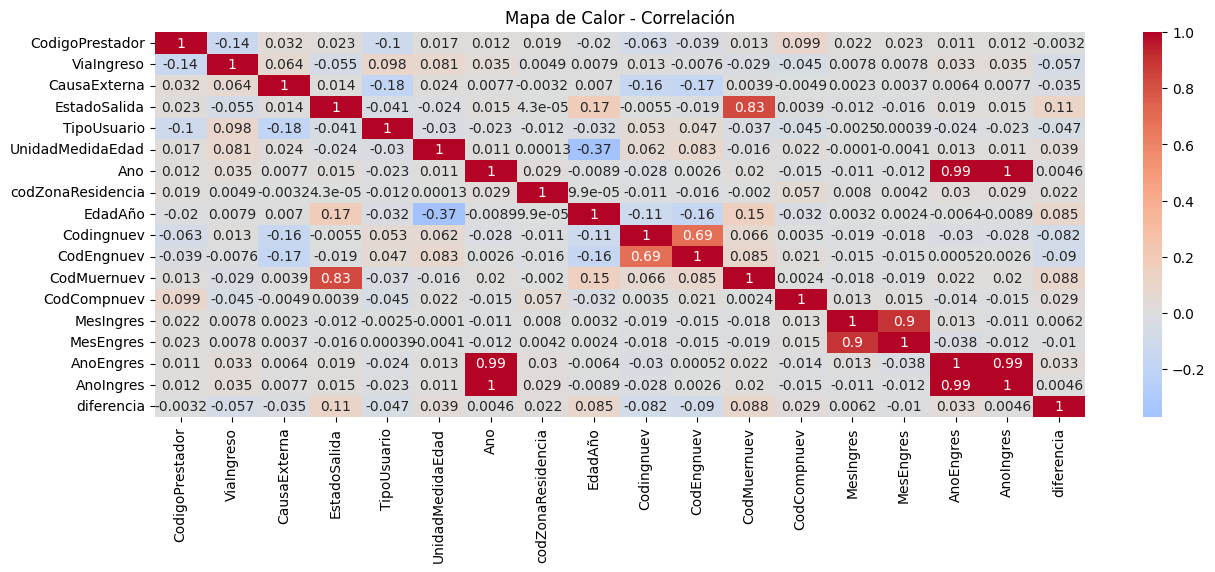

In [52]:
## selecciono solo columnas numericas
df_datos_numericos =df_reporte_salud_copia.select_dtypes(include=np.number)
##matriz =np.triu(np.ones_like(df_reporte_salud_copia.corr(),dtype=np.bool))
## Calcula y muestra el mapa de calor de las variables numericas
plt.figure(figsize=(15,5))
sns.heatmap(df_datos_numericos.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor - Correlación')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


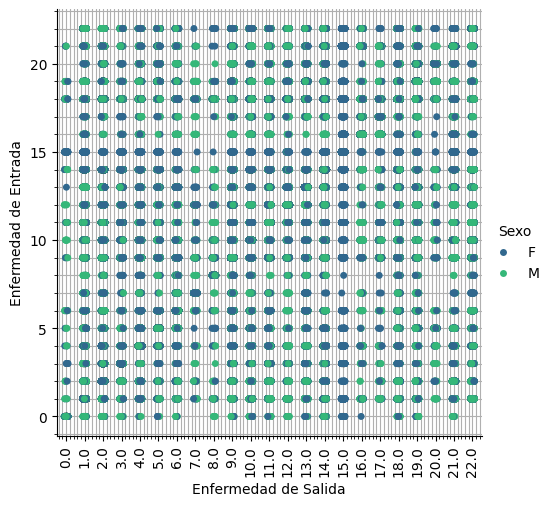

In [53]:
sns.catplot(data=df_reporte_salud_copia, x='CodEngnuev', y='Codingnuev', hue= 'Sexo',palette="viridis")
plt.xlabel("Enfermedad de Salida")
plt.ylabel("Enfermedad de Entrada")
plt.xticks(rotation=90)
plt.grid( which="both")
plt.minorticks_on()
plt.show()

In [54]:
lista_cod_ingreso=[]
lista_cod_egreso=[]

cuenta_masc=0
cuenta_fem=0
cuenta_Egre_Igual=0
cuenta_Egre_Difere=0

# Contar cuantas codigos de ingreso son iguales o no a los de egreso
cuenta_Egre_Igual = (df_reporte_salud_copia['Codingnuev'] == df_reporte_salud_copia["CodEngnuev"]).sum()
cuenta_Egre_Difere = (df_reporte_salud_copia['Codingnuev'] != df_reporte_salud_copia["CodEngnuev"]).sum()
cuenta_masc= (df_reporte_salud_copia['Sexo'] == 'M').sum()
cuenta_fem=(df_reporte_salud_copia['Sexo'] == 'F').sum()

#Porcentajes
porc_igual = round(cuenta_Egre_Igual/(cuenta_Egre_Igual+cuenta_Egre_Difere)*100,2)
porc_diferente = round(cuenta_Egre_Difere / (cuenta_Egre_Difere+cuenta_Egre_Igual)*100,2)
porc_masc=round(cuenta_masc / (cuenta_masc+cuenta_fem)*100,2)
porc_fem=round(cuenta_fem / (cuenta_fem+cuenta_masc)*100,2)



print(f"Ingresos igual a egresos: {cuenta_Egre_Igual} equivalente a: {porc_igual}%" )
print(f"Ingresos diferentes a egresos: {cuenta_Egre_Difere} equivalente a: {porc_diferente}%")
print(f'Cantidad de hombres que hospitalizan: {cuenta_masc} equivalente a:{porc_masc}%')
print(f'Cantidad de mujeres que hopitalizan: {cuenta_fem} equivalente a: {porc_fem}%')

Ingresos igual a egresos: 649333 equivalente a: 77.33%
Ingresos diferentes a egresos: 190405 equivalente a: 22.67%
Cantidad de hombres que hospitalizan: 345587 equivalente a:41.15%
Cantidad de mujeres que hopitalizan: 494151 equivalente a: 58.85%


In [55]:
# Dias de hospitalizacion por paciente
##df['diferencia_dias'] = (df['fecha_fin'] - df['fecha_inicio']).dt.days


In [56]:
df_reporte_salud_copia

,NumeroFactura,CodigoPrestador,ViaIngreso,FechaIngreso,HoraIngreso,CausaExterna,CodigoDiagnosticoPrincipalIngreso,CodigoDiagnosticoPrincipalEgreso,CodigoDiagnosticoRelN1Egreso,CodigoDiagnosticoRelN2Egreso,...,EdadAño,Codingnuev,CodEngnuev,CodMuernuev,CodCompnuev,MesIngres,MesEngres,AnoEngres,AnoIngres,diferencia
0,GE301820179,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,83.000000,19.0,19.0,0.0,0.0,10,11,2019,2019,8
1,GER183756,50010217808,3,2019-12-17,18:55,13,J441,J441,None,None,...,96.000000,10.0,10.0,10.0,0.0,12,1,2020,2019,22
2,GE301820180,50010217857,3,2019-10-31,19:06,5,S700,S700,None,None,...,83.000000,19.0,19.0,0.0,0.0,10,11,2019,2019,8
3,240875,50011313101,1,2019-12-06,08:51,13,B002,B002,None,None,...,1.000000,1.0,1.0,0.0,0.0,12,12,2019,2019,4
4,GE132730150,50010217804,4,2019-12-25,13:21,13,P080,P080,None,None,...,0.027397,16.0,16.0,0.0,0.0,12,12,2019,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839733,FH3001762,50010210401,1,2022-02-10,05:55,13,S060,S064,None,None,...,1.000000,19.0,19.0,0.0,0.0,2,2,2022,2022,7
839734,FH3003013,50010210401,1,2022-02-13,13:28,13,J22X,N390,None,None,...,1.000000,10.0,14.0,0.0,0.0,2,2,2022,2022,5
839735,FH3035502,50010210401,1,2022-03-24,13:58,13,J219,J219,None,None,...,0.328767,10.0,10.0,0.0,0.0,3,3,2022,2022,1
839736,FH3028015,50010210401,1,2022-03-05,16:26,13,T784,K904,None,None,...,0.246575,19.0,11.0,0.0,0.0,3,3,2022,2022,11


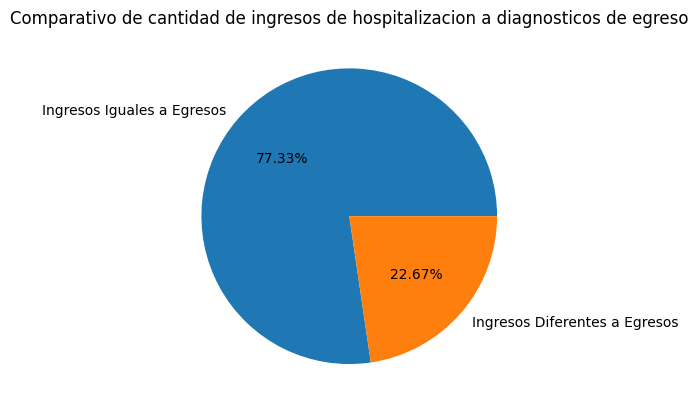

In [57]:
labels = 'Ingresos Iguales a Egresos', 'Ingresos Diferentes a Egresos'
sizes = [porc_igual,porc_diferente]

fig,ax=plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.2f%%')
plt.title("Comparativo de cantidad de ingresos de hospitalizacion a diagnosticos de egreso")
plt.show()

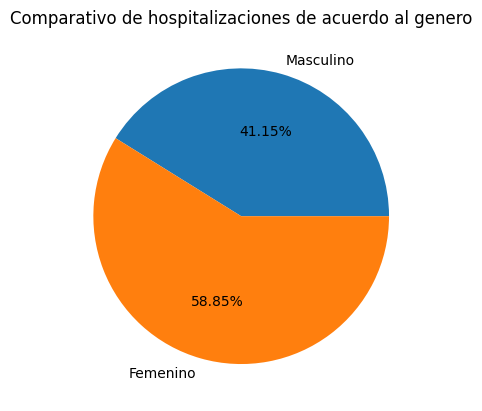

In [58]:
labels = 'Masculino', 'Femenino'
sizes = [porc_masc,porc_fem]

fig,ax=plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.2f%%')
plt.title("Comparativo de hospitalizaciones de acuerdo al genero")
plt.show()

In [59]:
top_10_diagnosticos=df_reporte_salud_copia.groupby([
    "Codingnuev",
    "CodEngnuev"]).size().sort_values(ascending=False).head(10)
top_10_diagnosticos

,,0
Codingnuev,CodEngnuev,
15.0,15.0,126733
10.0,10.0,65953
19.0,19.0,57566
9.0,9.0,56359
14.0,14.0,49197
2.0,2.0,43584
11.0,11.0,43387
18.0,18.0,32663
22.0,22.0,30696


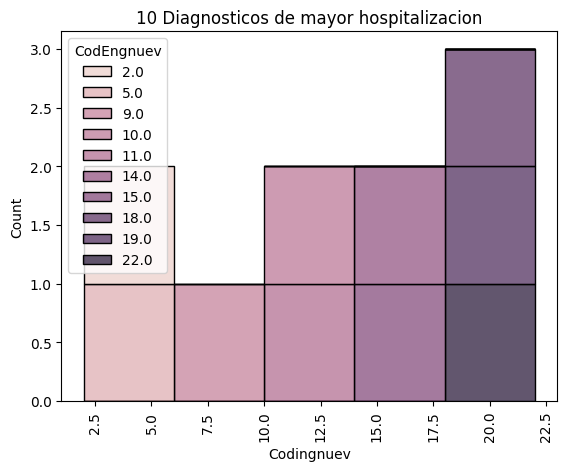

In [60]:
sns.histplot(data=top_10_diagnosticos.reset_index(),
            x="Codingnuev", ## eje x para categorias
            hue="CodEngnuev",## separar
            multiple="stack",)## graficamos con seaborn
plt.title("10 Diagnosticos de mayor hospitalizacion")
plt.xticks(rotation=90)## rotamos el eje x
plt.show()## mostramos la grafica

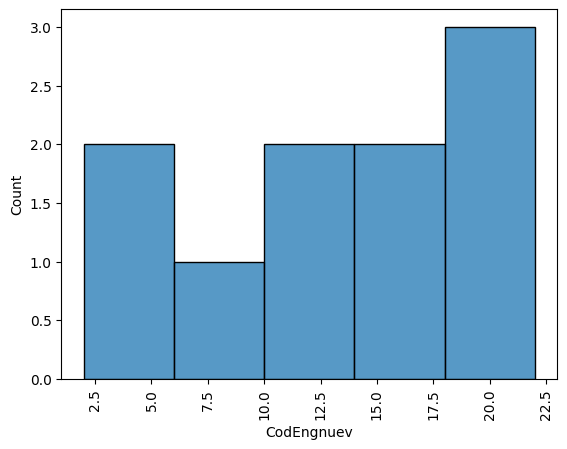

In [61]:
sns.histplot(data=top_10_diagnosticos.reset_index(), x="CodEngnuev")## Graficamos en seaborn
plt.xticks(rotation=90)## rotamos el eje x
plt.show()## mostramos grafica

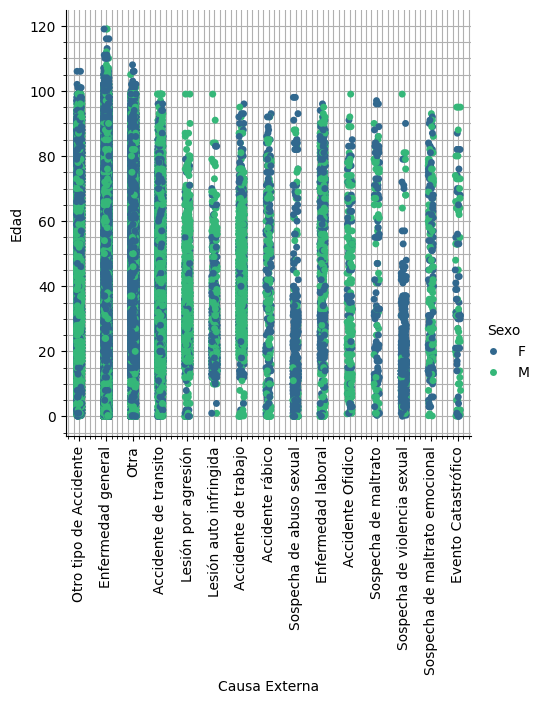

In [62]:
sns.catplot(data=df_reporte_salud_copia, x='CausaExternaNombre', y='EdadAño',hue="Sexo", palette="viridis")
plt.xlabel("Causa Externa")
plt.ylabel("Edad")
plt.xticks(rotation=90)
plt.grid( which="both")
plt.minorticks_on()
plt.show()

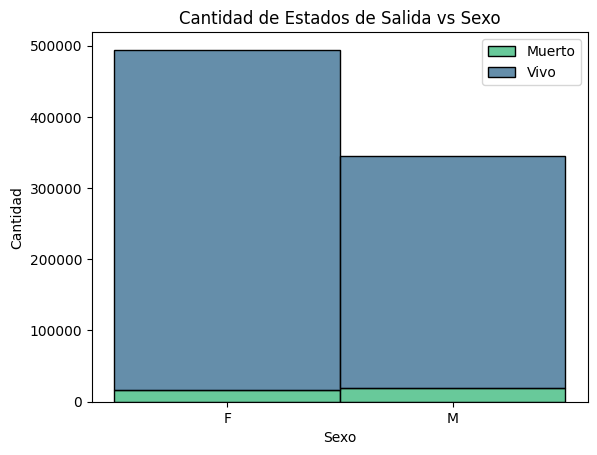

In [63]:
lista_leyenda=["Muerto","Vivo"]
sns.histplot(data=df_reporte_salud_copia, x="Sexo", hue="nombreEstadoSalida",multiple="stack", palette="viridis")
plt.title("Cantidad de Estados de Salida vs Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(lista_leyenda)
plt.show()

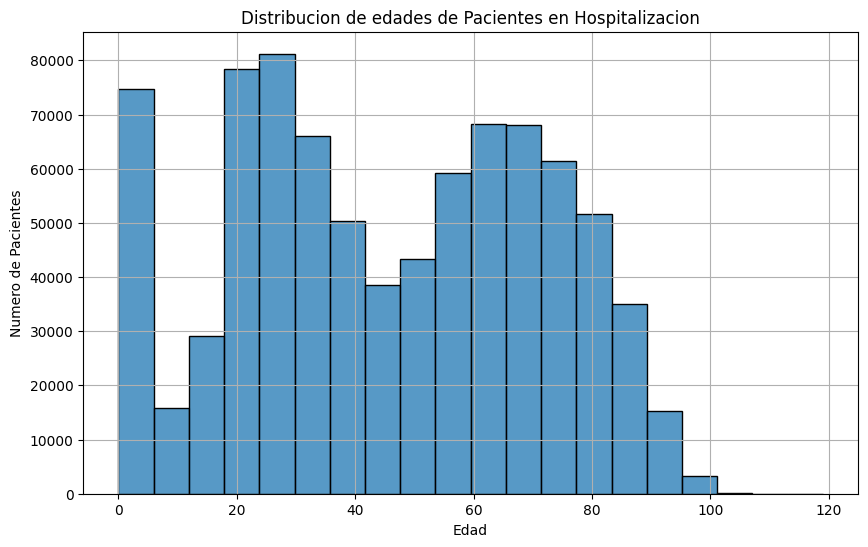

In [64]:
## Visualizacion de la distribucion de las edades
plt.figure(figsize=(10,6))## tamaño del grafico
sns.histplot(df_reporte_salud_copia["EdadAño"],bins=20,edgecolor="k")
plt.title("Distribucion de edades de Pacientes en Hospitalizacion")
plt.xlabel("Edad") ## titulo en eje x
plt.ylabel("Numero de Pacientes") ## titulo en eje y
plt.grid()## maya
plt.show()## mostrar grafico

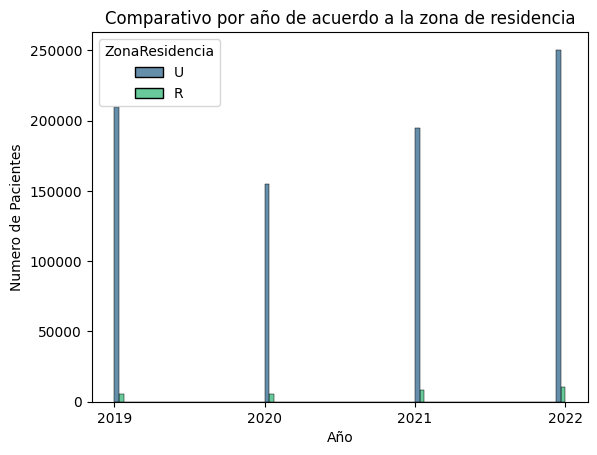

In [65]:
sns.histplot(data=df_reporte_salud_copia, x="Ano", hue="ZonaResidencia",multiple="dodge", palette="viridis")
plt.title("Comparativo por año de acuerdo a la zona de residencia")
plt.xticks(ticks=df_reporte_salud_copia["Ano"].unique().astype(int))
plt.xlabel("Año")
plt.ylabel("Numero de Pacientes")
plt.show()

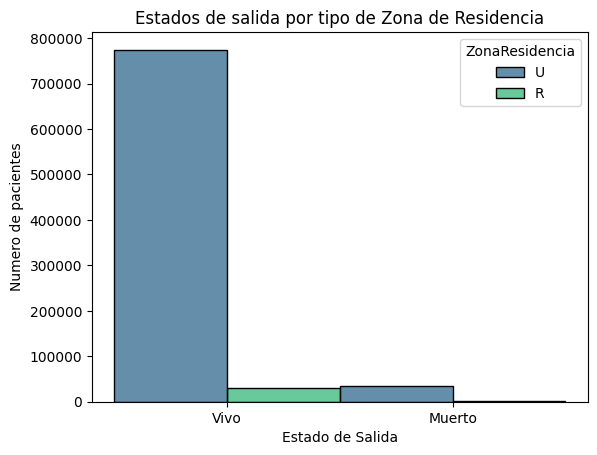

In [66]:
sns.histplot(data=df_reporte_salud_copia, x="nombreEstadoSalida", hue="ZonaResidencia",multiple="dodge", palette="viridis")
plt.title("Incidentes por comuna")
plt.xlabel("Estado de Salida")
plt.ylabel("Numero de pacientes")
plt.title("Estados de salida por tipo de Zona de Residencia")
plt.show()

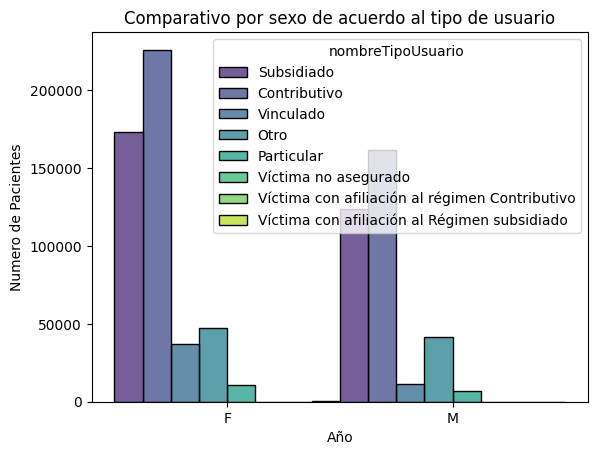

In [67]:
sns.histplot(data=df_reporte_salud_copia, x="Sexo", hue="nombreTipoUsuario",multiple="dodge", palette="viridis")
plt.title("Comparativo por sexo de acuerdo al tipo de usuario")
plt.xlabel("Año")
plt.ylabel("Numero de Pacientes")
##plt.title("Estados de salida por tipo de Zona de Residencia")
#plt.legend(loc='best')
plt.show()

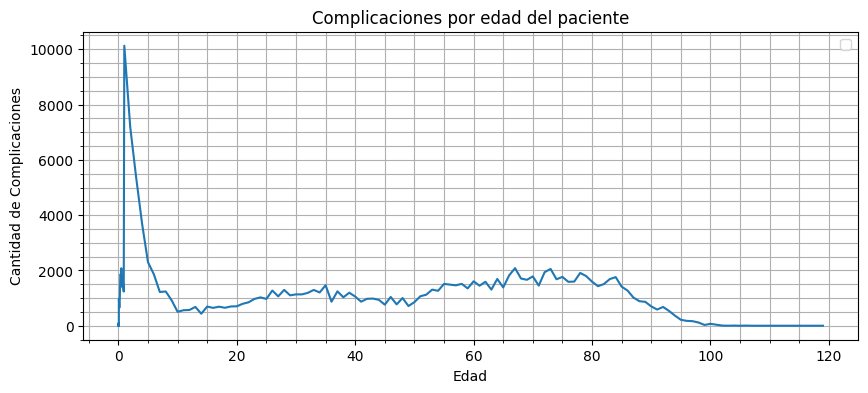

In [68]:
complicaciones=df_reporte_salud_copia.groupby(["EdadAño"])["CodCompnuev"].sum()
##Grafica
plt.figure(figsize=(10,4))
complicaciones.plot(legend=True)
plt.title("Complicaciones por edad del paciente")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Complicaciones")
plt.grid(which="both")
plt.legend("")
plt.minorticks_on()
plt.show()

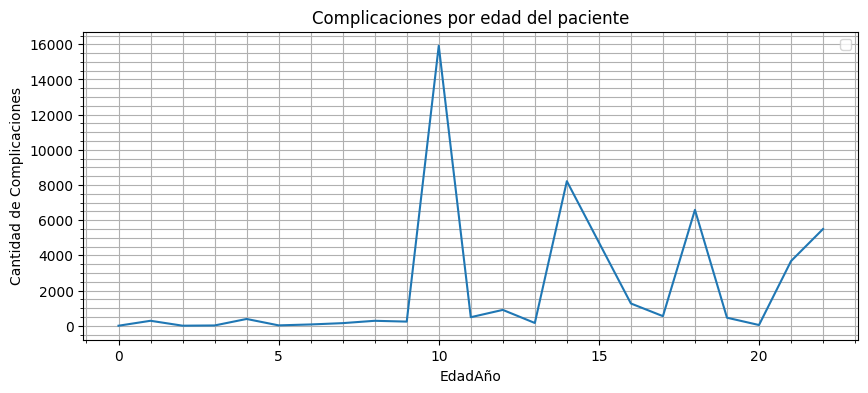

In [69]:
df_prueb=df_reporte_salud_copia
condicion= df_prueb['EdadAño'] <=5
df_filtered = df_prueb[condicion]
##complicaciones = df_filtered.groupby(["CodCompnuev"])["CodCompnuev"].sum()
complicaciones = df_filtered.groupby(["CodCompnuev"])["CodCompnuev"].sum()
##Grafica
plt.figure(figsize=(10,4))
complicaciones.plot(legend=True)
plt.title("Complicaciones por edad del paciente")
plt.xlabel("EdadAño")
plt.ylabel("Cantidad de Complicaciones")
plt.grid(which="both")
plt.legend("")
plt.minorticks_on()
plt.show()

In [70]:
df_filtered['EdadAño']

,EdadAño
3,1.000000
4,0.027397
5,1.000000
8,4.000000
9,5.000000
...,...
839733,1.000000
839734,1.000000
839735,0.328767
839736,0.246575


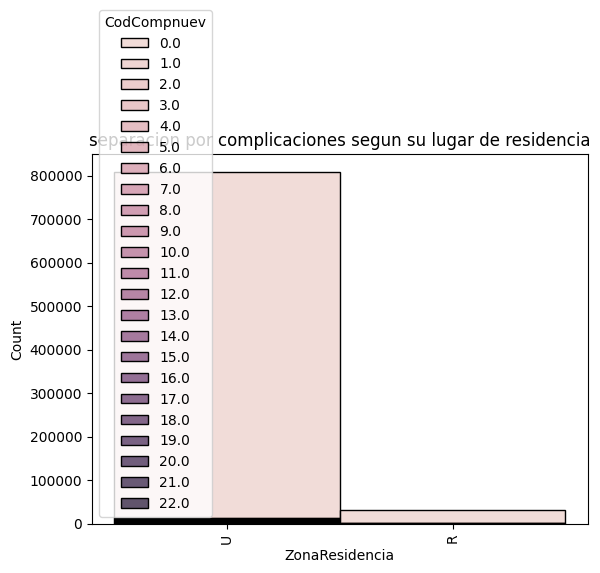

In [71]:
sns.histplot(data=df_reporte_salud_copia,
            x="ZonaResidencia", ## eje x para categorias
            hue="CodCompnuev",## separar por complicaciones
            multiple="stack",)## graficamos con seaborn
plt.title("separacion por complicaciones segun su lugar de residencia")
plt.xticks(rotation=90)## rotamos el eje x
plt.show()## mostramos la grafica

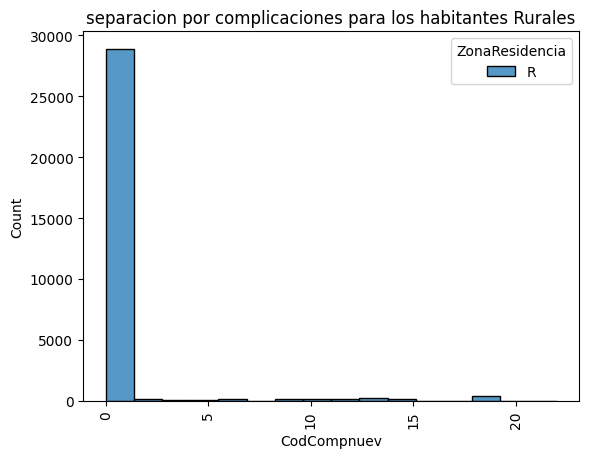

In [89]:
df_rural=df_reporte_salud_copia[df_reporte_salud_copia['ZonaResidencia'] == 'R']
sns.histplot(data=df_rural,
            x="CodCompnuev", ## eje x para categorias
            hue="ZonaResidencia",## separar por complicaciones
            multiple="stack",)## graficamos con seaborn
plt.title("separacion por complicaciones para los habitantes Rurales")
plt.xticks(rotation=90)## rotamos el eje x
plt.show()## mostramos la grafica

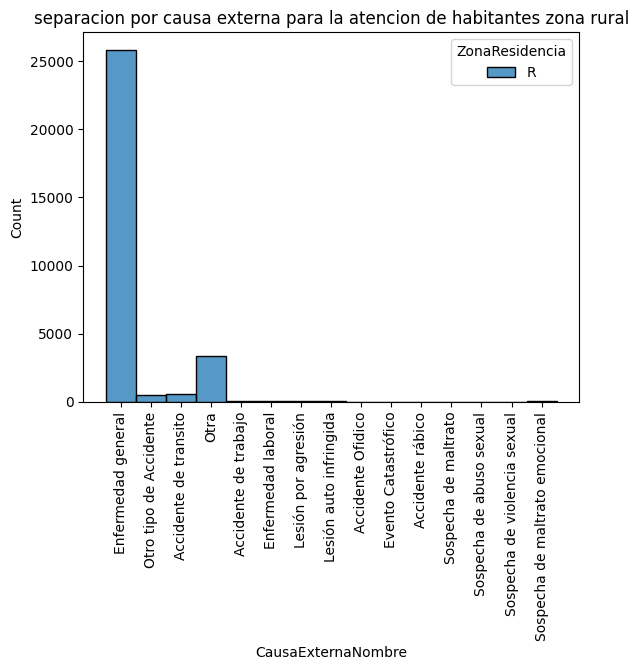

In [90]:
sns.histplot(data=df_rural,
            x="CausaExternaNombre", ## eje x para categorias
            hue="ZonaResidencia",## separar por complicaciones
            multiple="stack",)## graficamos con seaborn
plt.title("separacion por causa externa para la atencion de habitantes zona rural")
plt.xticks(rotation=90)## rotamos el eje x
plt.show()## mostramos la grafica

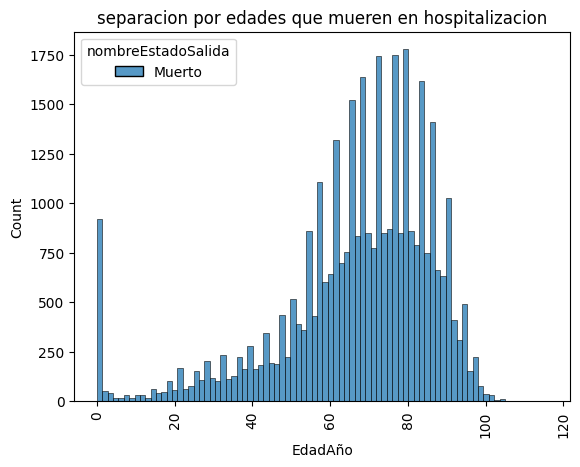

In [74]:
df_muerto=df_reporte_salud_copia[df_reporte_salud_copia['EstadoSalida'] == 2]
sns.histplot(data=df_muerto,
            x="EdadAño", ## eje x para categorias
            hue="nombreEstadoSalida",## separar por complicaciones
            multiple="stack",)## graficamos con seaborn
plt.title("separacion por edades que mueren en hospitalizacion")
plt.xticks(rotation=90)## rotamos el eje x
plt.show()## mostramos la grafica

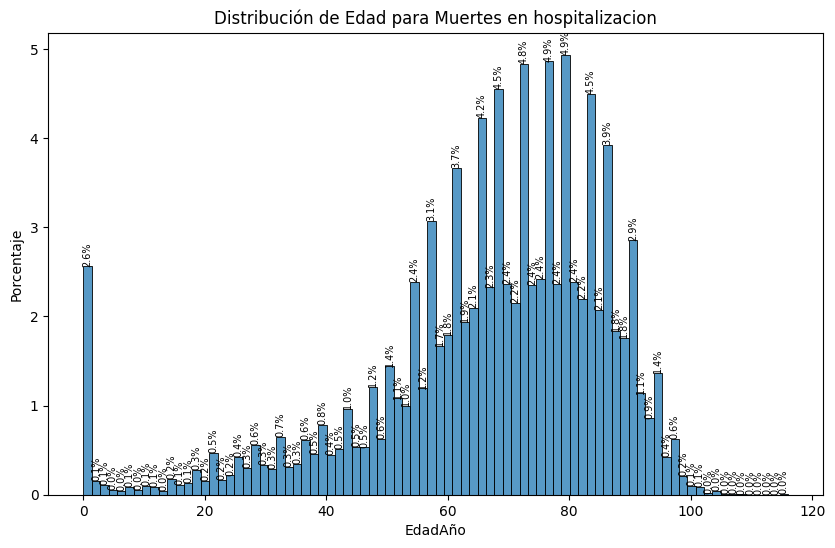

In [111]:
plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura si es necesario
ax = sns.histplot(data=df_muerto, x='EdadAño', stat='percent', kde=False) # 'stat='percent' muestra frecuencias como porcentajes
# Opcional: añade una curva KDE para suavizar el histograma
# ax = sns.histplot(data=data=df_muerto, x='EdadAño', stat='percent', kde=True)

# Añade etiquetas personalizadas a cada barra
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()) # Formato del porcentaje
    x = p.get_x() + p.get_width() / 2  # Calcula la posición X de la etiqueta
    y = p.get_height() # Calcula la posición Y de la etiqueta
    ax.annotate(percentage, (x, y), ha='center', va='bottom',rotation=90, fontsize=7) # Añade la etiqueta
plt.title('Distribución de Edad para Muertes en hospitalizacion') # Título del gráfico
plt.xlabel('EdadAño') # Etiqueta del eje X
plt.ylabel('Porcentaje') # Etiqueta del eje Y
plt.show() # Muestra el gráfico

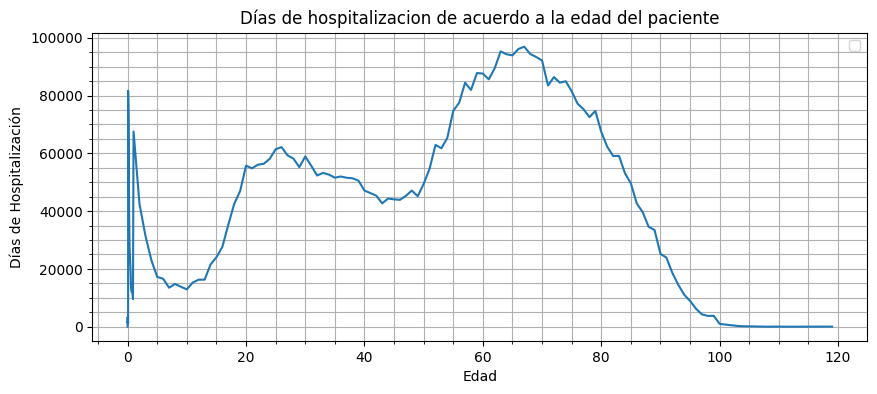

In [76]:
dias_hospitaliacion=df_reporte_salud_copia.groupby(["EdadAño"])["diferencia"].sum()
##Grafica
plt.figure(figsize=(10,4))
dias_hospitaliacion.plot(legend=True)
plt.title("Días de hospitalizacion de acuerdo a la edad del paciente")
plt.xlabel("Edad")
plt.ylabel("Días de Hospitalización")
plt.grid(which="both")
plt.legend("")
plt.minorticks_on()
plt.show()

In [77]:
flights_wide = df_reporte_salud_copia.drop_duplicates(subset=['FechaIngreso', 'FechaEgreso']).pivot(index="FechaIngreso", columns="FechaEgreso", values="diferencia")
flights_wide.head()

FechaEgreso,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2023-03-31,2023-04-02,2023-04-07,2023-04-14,2023-04-15,2023-04-21,2023-05-05,2023-05-12,2023-05-26,2023-05-29
FechaIngreso,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,0.0,1.0,2.0,3.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='AnoIngres', ylabel='diferencia'>

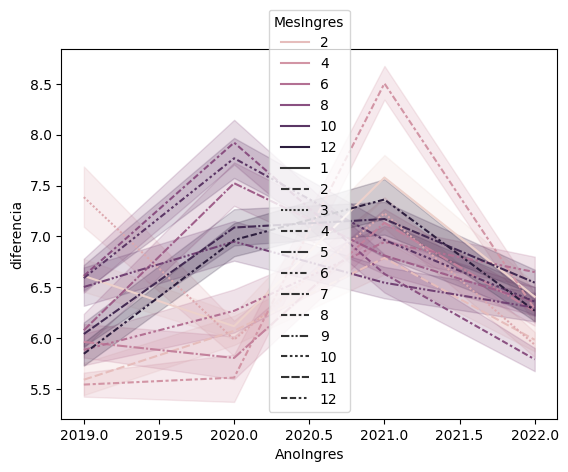

In [78]:
sns.lineplot(data=df_reporte_salud_copia, x="AnoIngres", y="diferencia", hue="MesIngres", style="MesIngres")

In [79]:
HospitalMensuales=df_reporte_salud_copia.groupby(["AnoIngres","MesIngres"])["diferencia"].sum()

In [80]:
HospitalMensuales

AnoIngres  MesIngres
2019       1             99866
           2             84651
           3            119970
           4            102740
           5             99324
           6             92488
           7            101783
           8            103737
           9            113881
           10           139861
           11           143061
           12           134741
2020       1            128867
           2            105654
           3             75838
           4             46687
           5             50606
           6             58514
           7             79191
           8             93064
           9             86295
           10           118508
           11           113631
           12           116887
2021       1            120404
           2            103438
           3            127269
           4            143345
           5            134730
           6            134189
           7            114563
           8             99005
           9            106042
           10           109412
           11           114880
           12           144577
2022       1            138807
           2            112836
           3            126022
           4            117816
           5            120521
           6            132461
           7            134952
           8            134219
           9            136101
           10           144909
           11           164857
           12           172019
Name: diferencia, dtype: int64

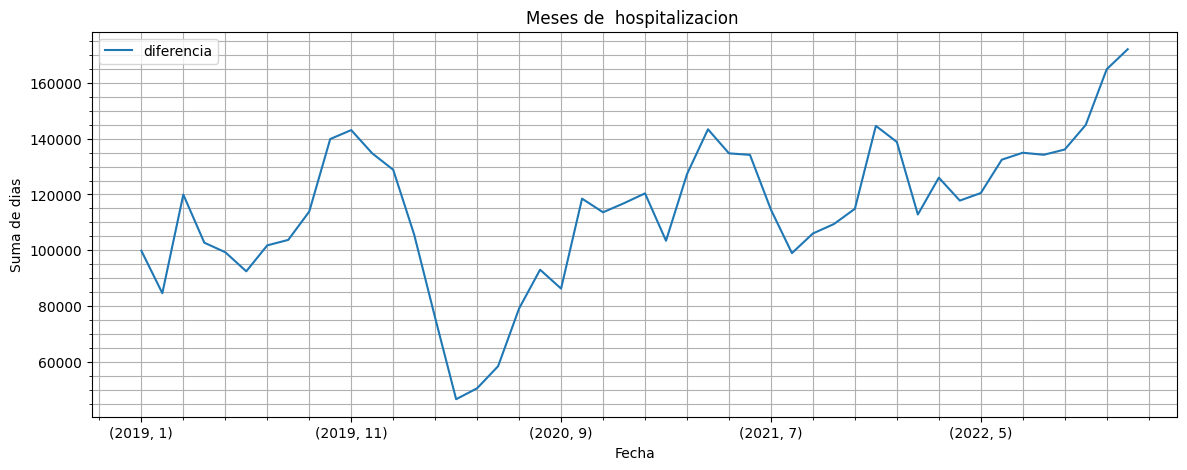

In [81]:
##Hospitalizacion por mes de acuerdo a fecha de ingreso
HospitalMensuales=df_reporte_salud_copia.groupby(["AnoIngres","MesIngres"])["diferencia"].sum()
##Grafiquemos
plt.figure(figsize=(14,5))
HospitalMensuales.plot(legend=True)
plt.title("Meses de  hospitalizacion ")
plt.xlabel("Fecha")
plt.ylabel("Suma de dias")
plt.grid(which="both")
plt.minorticks_on()
plt.show()

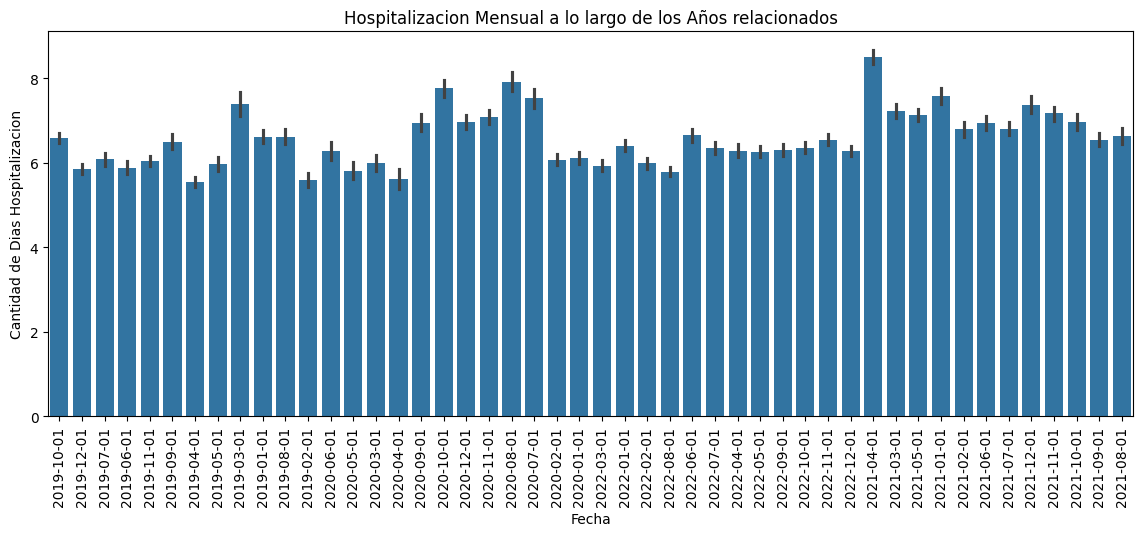

In [82]:
## primero reseteo los indices para reordenar
HospitalMensuales_df=HospitalMensuales.reset_index()
## se configura una estructura donde la fecha comienza por año-mes-dia
## el astype modifica para que sea tipo str
df_reporte_salud_copia["Date"]=pd.to_datetime(
    df_reporte_salud_copia['AnoIngres'].astype(str)+"-"+df_reporte_salud_copia['MesIngres'].astype(str))
plt.figure(figsize=(14,5))
sns.barplot(data=df_reporte_salud_copia,x='Date',y='diferencia')
plt.title("Hospitalizacion Mensual a lo largo de los Años relacionados")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Dias Hospitalizacion")
plt.xticks(rotation=90)
plt.show()

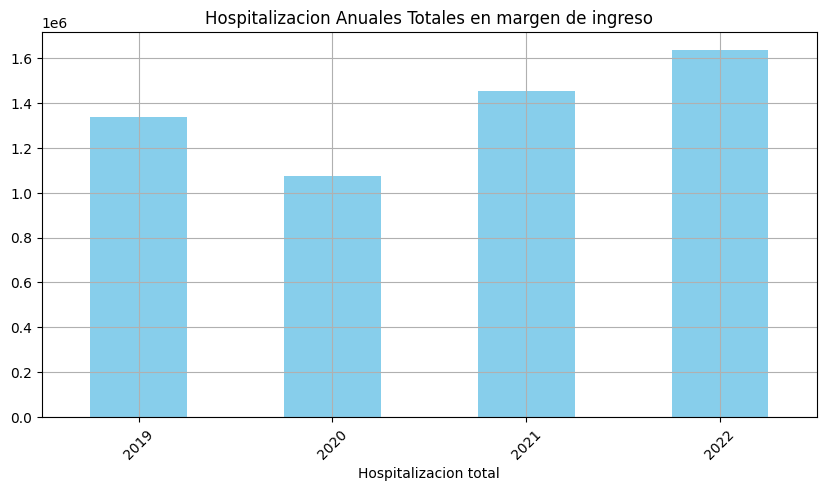

In [83]:
## pandas
##Ventas anuales totales
ventasAnuales=df_reporte_salud_copia.groupby(["AnoIngres"])["diferencia"].sum()
## Grafiquemos
plt.figure(figsize=(10,5))
## Grafico con pandas, el kind se define que tipo de grafica se desea realizar
ventasAnuales.plot(kind="bar",color="skyblue")
plt.title("Hospitalizacion Anuales Totales en margen de ingreso")
plt.xlabel("Año")
plt.xlabel("Hospitalizacion total")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Método del codo y Clustering

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Caracteristicas para clustering
X=df_reporte_salud_copia[["EdadAño","CausaExterna"]]

##Escalar las carateristicas para que tengan la misma importancia - para poderse graficar
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [85]:
X_scaled

array([[ 1.44353241, -3.87802118],
       [ 1.94338509,  0.06636325],
       [ 1.44353241, -3.87802118],
       ...,
       [-1.73519348,  0.06636325],
       [-1.73835377,  0.06636325],
       [-1.73835377,  0.06636325]])

In [86]:
axes=[]
for i in range(1,8):
  Kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  Kmeans.fit(X_scaled)
  axes.append(Kmeans.inertia_)
axes

[1679475.9999984966,
 1039288.315339436,
 333827.74662231415,
 252595.5777149522,
 194282.2440855568,
 167459.54279218527,
 115330.56354203788]

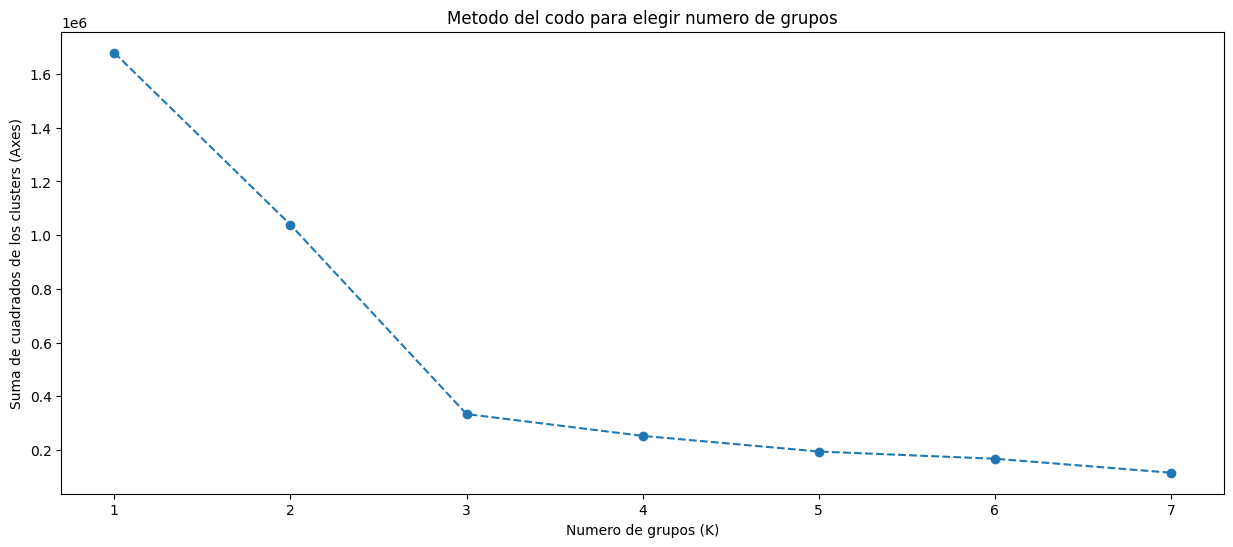

In [87]:
##Grafica
plt.figure(figsize=(15,6))
plt.plot(range(1,8), axes, marker="o",linestyle="--")
plt.title("Metodo del codo para elegir numero de grupos")
plt.xlabel("Numero de grupos (K)")
plt.ylabel("Suma de cuadrados de los clusters (Axes)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


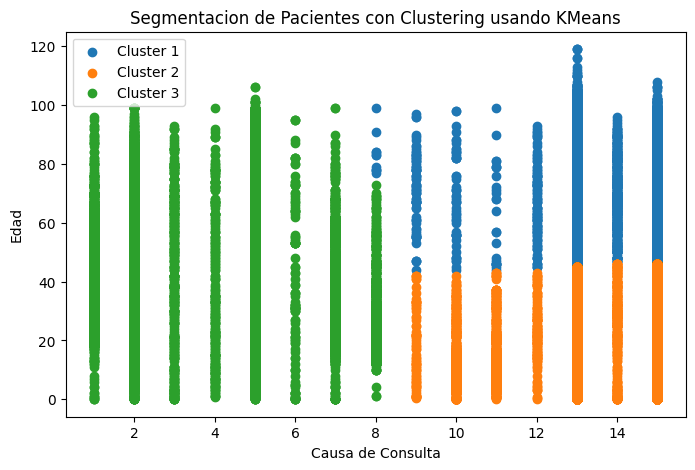

In [88]:
k=3
##Aplica Kmeans
Kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
Kmeans.fit(X_scaled)    ##Aplicar los grupos encontrados a los datos escalados
##Etiquetas
df_reporte_salud_copia["Cluster"]=Kmeans.labels_
##Visualizar los grupos en el grafico de dispersion
plt.figure(figsize=(8,5))
for i in range(k):
  cluster_data=df_reporte_salud_copia[df_reporte_salud_copia["Cluster"]==i]
  plt.scatter(cluster_data["CausaExterna"], cluster_data["EdadAño"], label= f'Cluster {i+1}')  ##Puede cambiar la variables para segmenta
plt.title("Segmentacion de Pacientes con Clustering usando KMeans")
plt.xlabel("Causa de Consulta")
plt.ylabel("Edad")
plt.legend()
plt.show()